In [156]:
import pandas as pd 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
sns.set_style('whitegrid')
mpl.rc('axes',unicode_minus=False)
#*/datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
##holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals/*

In [140]:
from matplotlib import font_manager,rc
font_f = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_f)

In [141]:
bike = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/Untitled Folder 1/csv데이터/train.csv",parse_dates=['datetime'])
bike.shape

(10886, 12)

In [142]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [143]:
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike["minute"] = bike["datetime"].dt.minute
bike["second"] = bike["datetime"].dt.second
bike["dayofweek"] = bike["datetime"].dt.dayofweek
bike.shape

(10886, 19)

In [144]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [145]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB


In [146]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dayofweek     0
dtype: int64

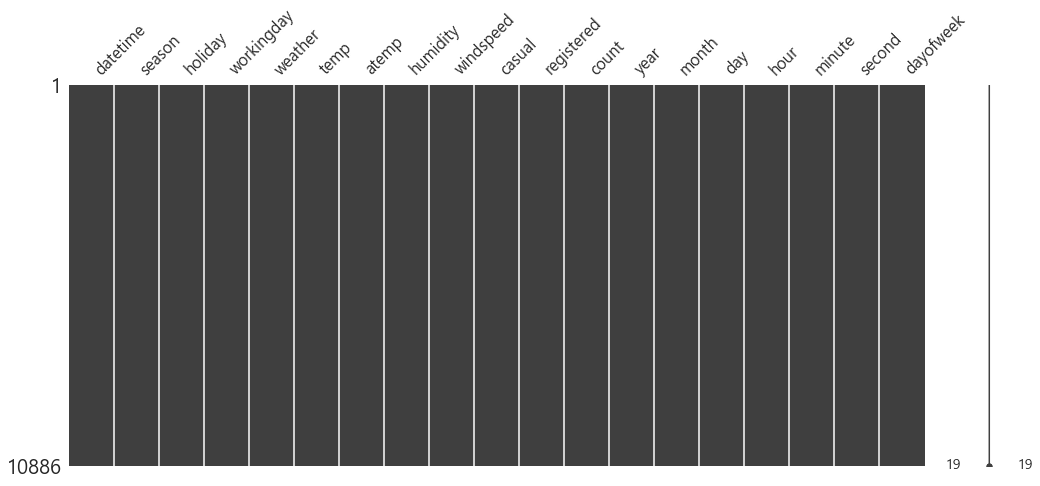

In [147]:
import missingno 
missingno.matrix(bike,figsize=(17,7))

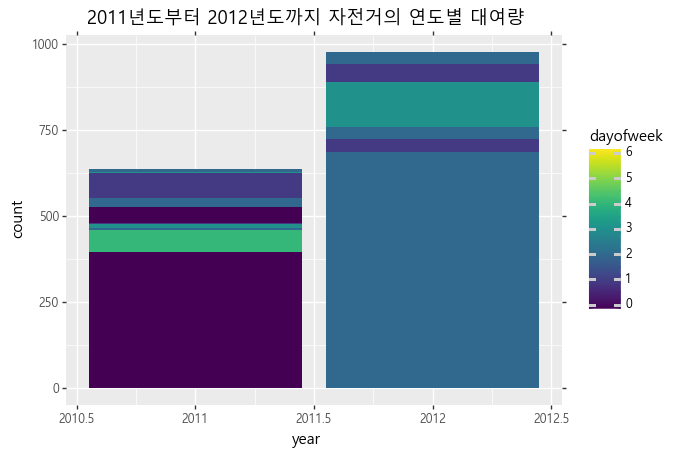

<ggplot: (-9223371908825529316)>

In [148]:
(ggplot(bike,aes(x='year',y='count',fill='dayofweek'))
    +geom_bar(stat='identity',position='dodge')
    +ggtitle("2011년도부터 2012년도까지 자전거의 연도별 대여량")
    +theme(text=element_text(family=font_f)))

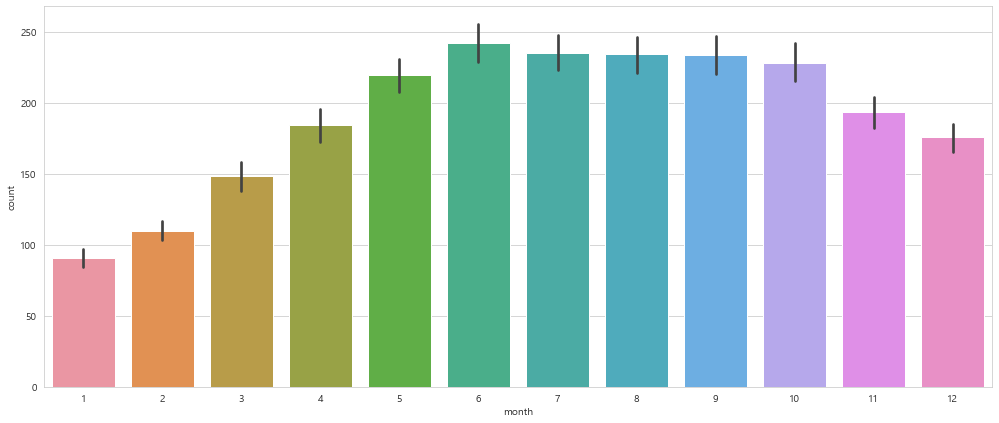

In [149]:
fig,ax2=plt.subplots()
fig.set_size_inches(17,7)
sns.barplot(data=bike,x='month',y='count',ax=ax2)


대여량은 가을에 가장 많고 봄에 가장 적다.


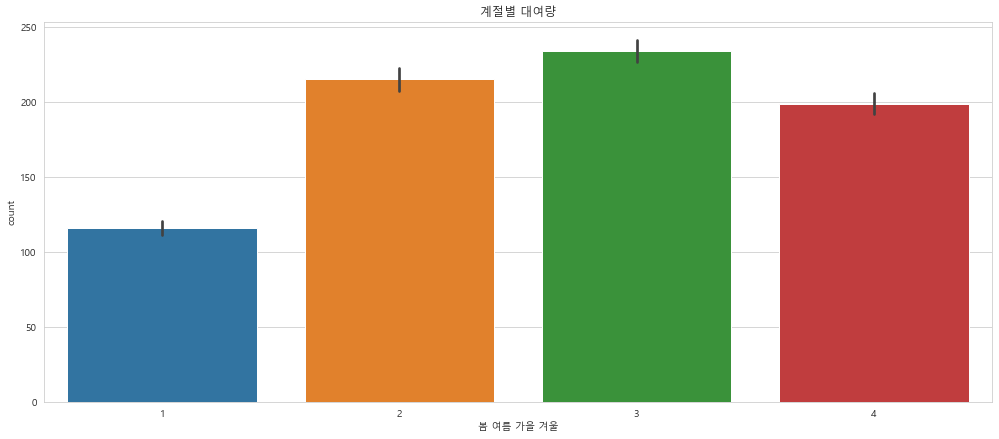

In [150]:
fig,ax3=plt.subplots()
fig.set_size_inches(17,7)
sns.barplot(data=bike,x='season',y='count',ax=ax3)
plt.title("계절별 대여량")
plt.xlabel("봄 여름 가을 겨울")
print("대여량은 가을에 가장 많고 봄에 가장 적다.")

1번은 맑고, 2번은 안개에 흐리고, 3번은 가벼운 눈이나 비,구름 , 4번은 폭우와 안개 혹은 눈과 안개
4번 폭우와 안개일 때는 대여량이 거의 없는 것을 확인할 수 있다.


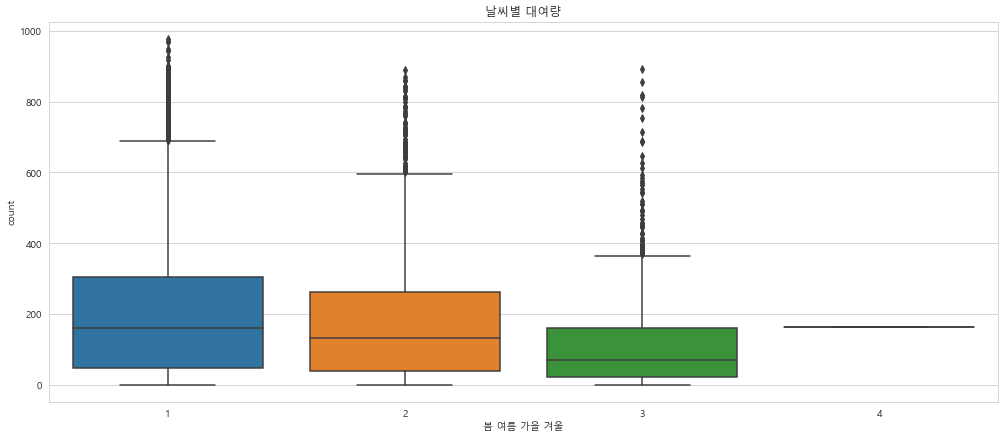

In [151]:
fig,ax3=plt.subplots()
fig.set_size_inches(17,7)
sns.boxplot(data=bike,x='weather',y='count',ax=ax3)
plt.title("날씨별 대여량")
plt.xlabel("봄 여름 가을 겨울")
print("1번은 맑고, 2번은 안개에 흐리고, 3번은 가벼운 눈이나 비,구름 , 4번은 폭우와 안개 혹은 눈과 안개")
print("4번 폭우와 안개일 때는 대여량이 거의 없는 것을 확인할 수 있다.")
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [152]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

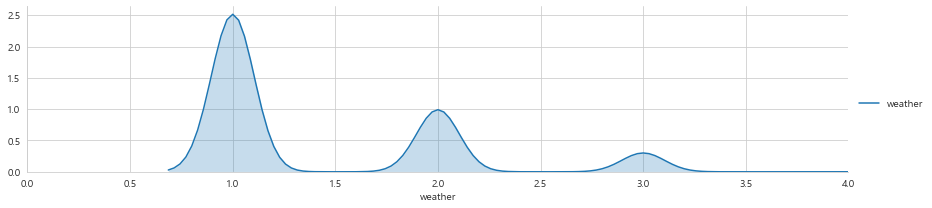

In [153]:
facet = sns.FacetGrid(bike,aspect=4)
facet.map(sns.kdeplot,'weather',shade= True)
facet.set(xlim=(0, bike['weather'].max()))
facet.add_legend()

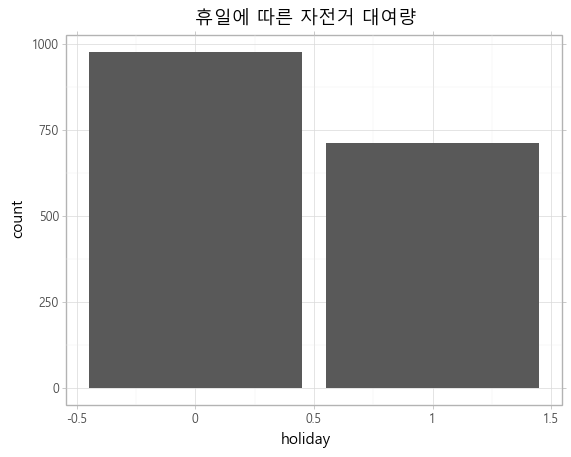

<ggplot: (-9223371908847654884)>

In [157]:
(ggplot(bike,aes(x='holiday',y='count'))
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('휴일에 따른 자전거 대여량')
    +theme_light(11,base_family=font_f))


In [158]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB


In [159]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    predictWind0["windspeed"] = wind0Values
    data = predictWindNot0.append(predictWind0)
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

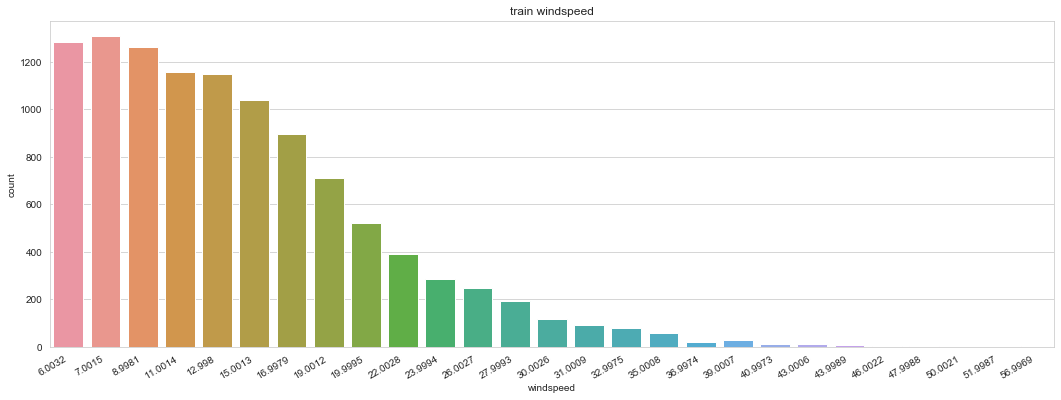

In [160]:
train = predict_windspeed(bike)


fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)